# 1. Set-up
- Import libraries
- Set directories
- A function to retrieve the data about 1 star

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as f
from os import listdir

In [2]:
#path to data
path = 'data'

In [3]:
#list of star names
all_stars = np.array(sorted(listdir(path)))

In [35]:
def star_data(idx, star_names):
    ''' Returns the flux data of the star at the corresponding data at index idx as a 2d numpy array. '''
    name, date = star_info(idx, star_names)
    with f.open(f'{path}/{name}/{date}/B_H/calibration/flux/{name}_{date}_cube_flux_processed_right.fits') as hdul:
        data = hdul[0].data
    return data[0]

In [36]:
def star_info(idx, star_names):
    ''' Returns the name of the star and the date of the observation at index idx as a tuple. '''
    return star_names[idx], listdir(f'{path}/{star_names[idx]}')[0]

In [37]:
#Show which stars have more than 1 file
mask_dates = np.array([len(listdir(f'data/{all_stars[i]}'))!= 1 for i in range(len(all_stars))])
more_dates = all_stars[mask_dates]
#print(more_dates)

# 1.5 Make weird, binary and single star array

In [ ]:
weird_stars = ['2MASSJ11320835-5803199', '2MASSJ12041439-6418516', '2MASSJ12123577-5520273', 
             '2MASSJ12192161-6454101', '2MASSJ12205449-6457242', '2MASSJ12472196-6808397',
             '2MASSJ12582559-7028490', '2MASSJ13032904-4723160']

In [56]:
binary_stars= ['2MASSJ11555771-5254008', '2MASSJ12560830-6926539', '2MASSJ13015435-4249422',
          '2MASSJ13130714-4537438', 'CD-43_3604', 'CVSO_751', 'Gaia_EDR3_3008386787098934144',
          'HD_283629', 'HD_284266', 'HD_286179', 'UCAC4_454-011718', 'UCAC4_475-014428', 'UCAC4_495-030196', 
          'UCAC4_501-011878']

In [ ]:
def mask_arr(arr, star_names):
    mask = np.ones_like(star_names, dtype = bool)
    for i in arr:
        idx = np.where(star_names == i)
        mask[idx] = False
    return mask

In [ ]:
#Make array of single stars
mask = mask_arr(binary_stars, all_stars)*mask_arr(weird_stars, all_stars)
single_stars = all_stars[mask]

# 3. Cutting out central 200 pixels
- Circle of 200 pixels around center
- 200 x 200 pixelsaround center

In [ ]:
def mask_but_center(arr, r):
    ''' Masks everything but the area with radius r in a circle around the center. '''
    x = y = np.linspace(-(len(arr))/2, (len(arr))/2, len(arr))
    x_grid, y_grid = np.meshgrid(x, y)
    r_grid = np.sqrt(x_grid**2 + y_grid**2)
    arr[r_grid > r] = None #np.sqrt(A/np.pi) gives the radius of a circle with size A
    return arr

def normalize(arr):
    ''' Normalizes the array '''
    arr = np.array(arr,dtype=np.float64)
    return arr/np.nanmax(arr)

def calibration(arr, r):
    ''' Masks and then normalizes the array. '''
    mask_arr = mask_but_center(arr, r)
    norm_arr = normalize(mask_arr)
    return norm_arr

In [54]:
def print_stars(idx, star_names):
    ''' Print the masked and normalised flux image of the star at index idx. '''
    name, date = star_info(idx, star_names)
    star = calibration(star_data(idx, star_names), 100)
    
    plt.subplot(1, 2, 1)
    plt.imshow(star)
    plt.gca().invert_yaxis()
    plt.xlim(400, 624)
    plt.ylim(400, 624)

    plt.subplot(1, 2, 2)
    plt.imshow(star)
    plt.gca().invert_yaxis()
    plt.xlim(500, 524)
    plt.ylim(500, 524)

    plt.suptitle(f'{name}, {date}', y = 0.8)
    plt.show()

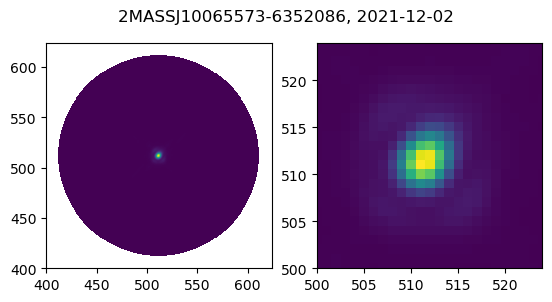

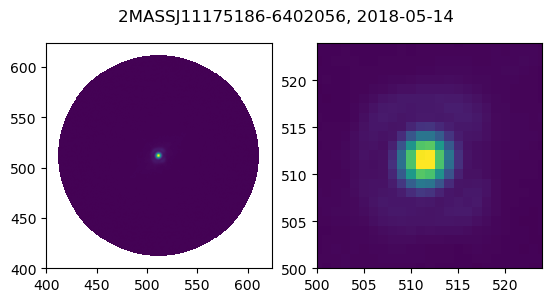

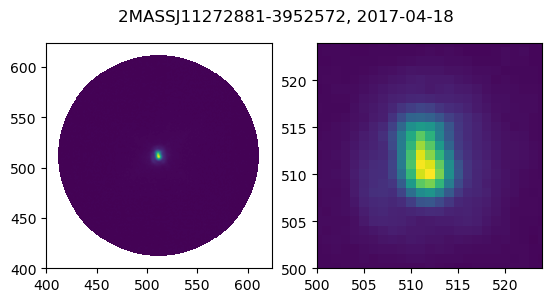

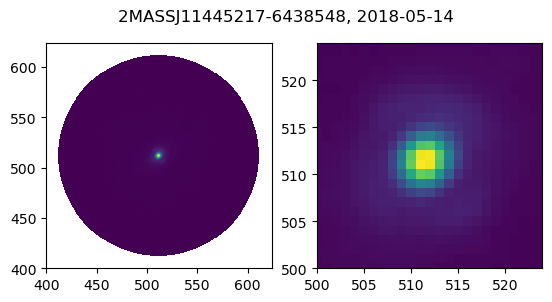

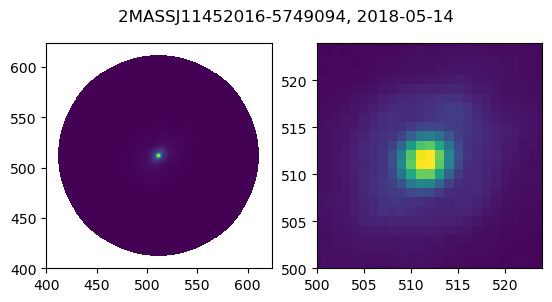

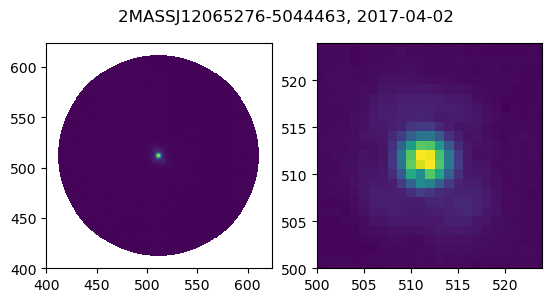

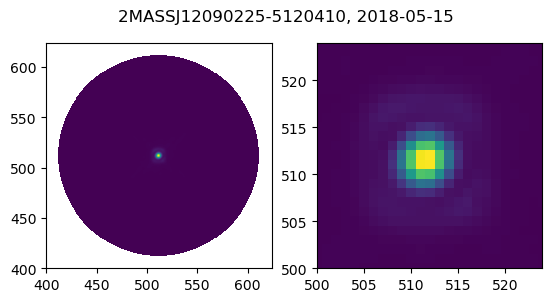

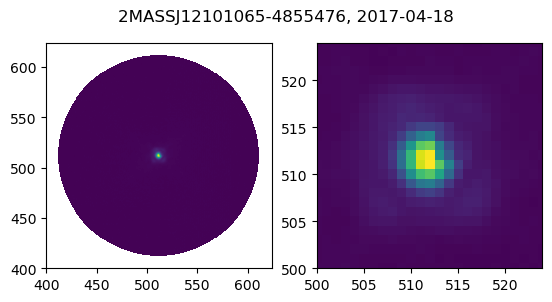

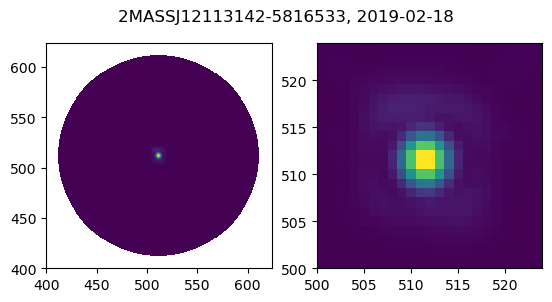

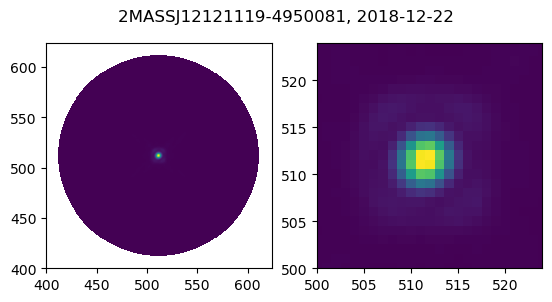

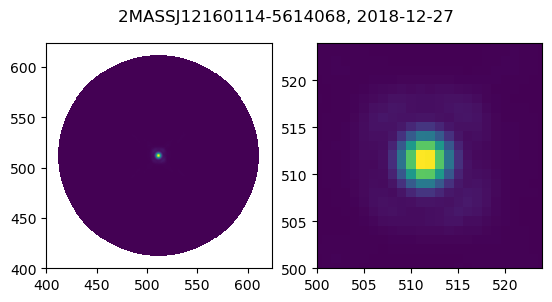

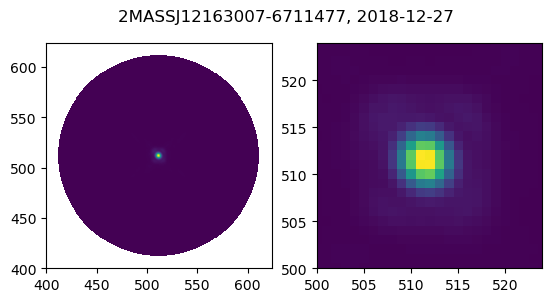

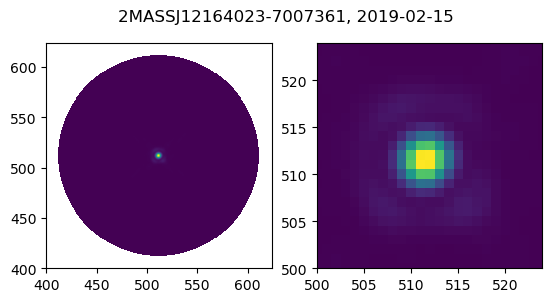

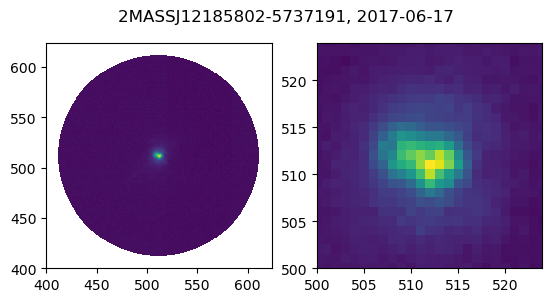

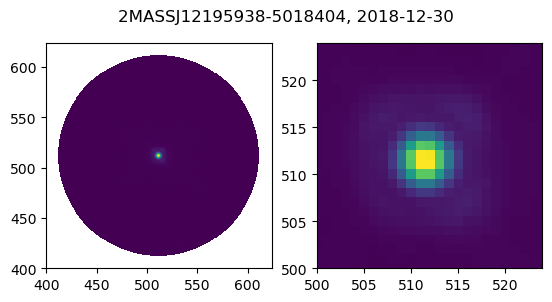

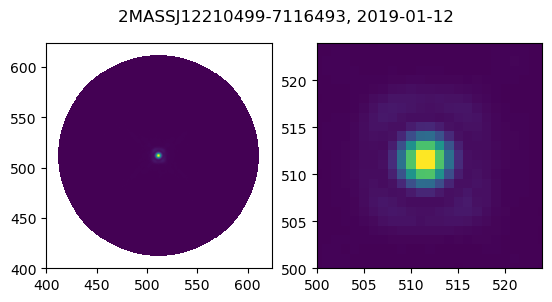

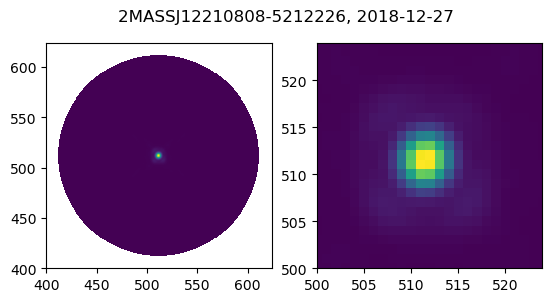

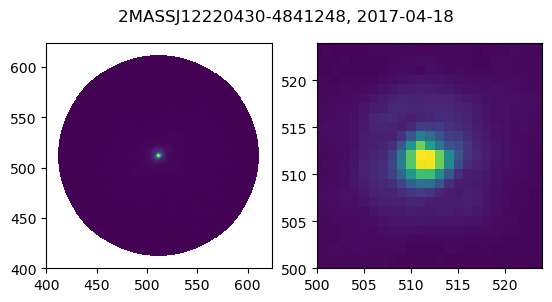

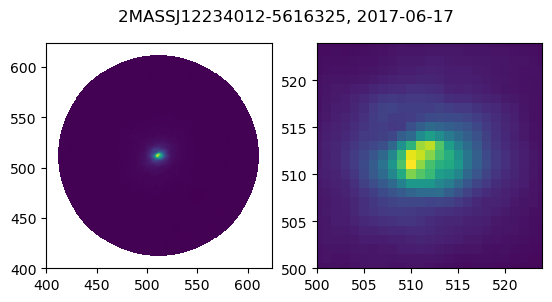

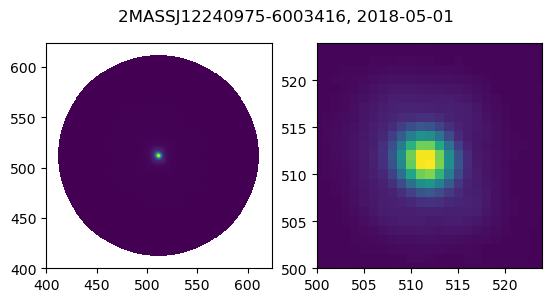

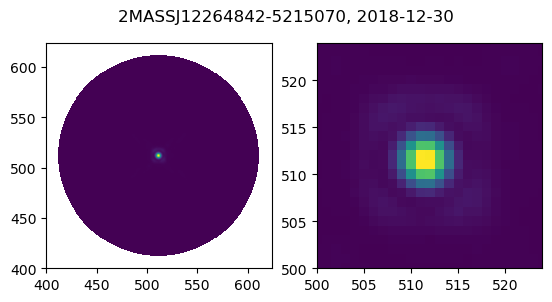

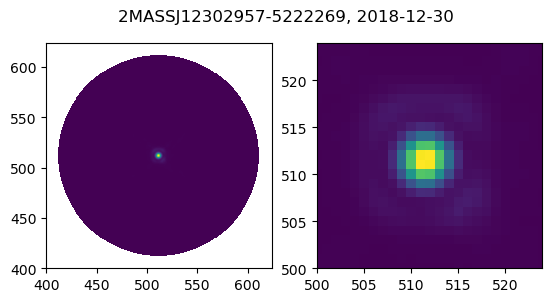

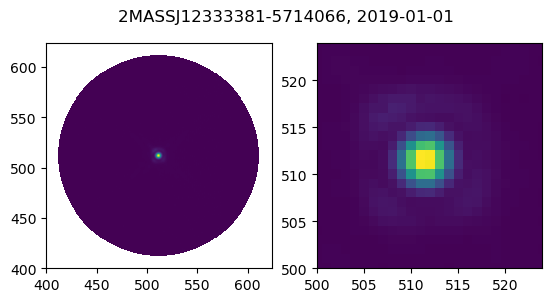

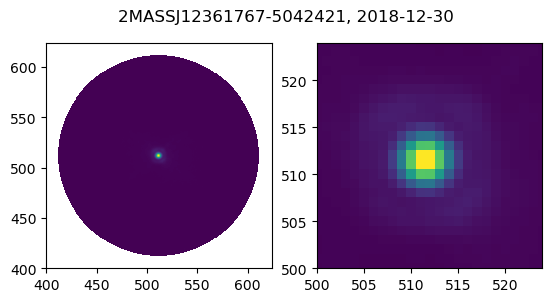

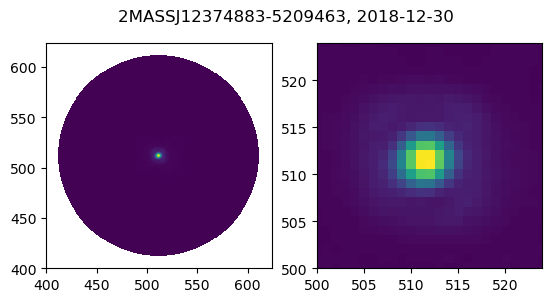

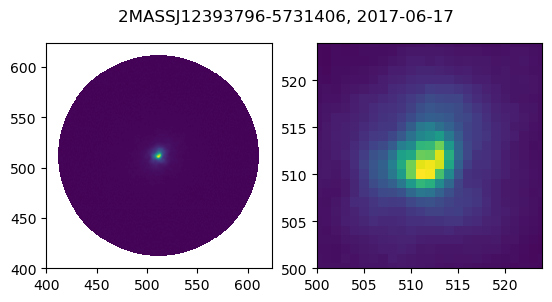

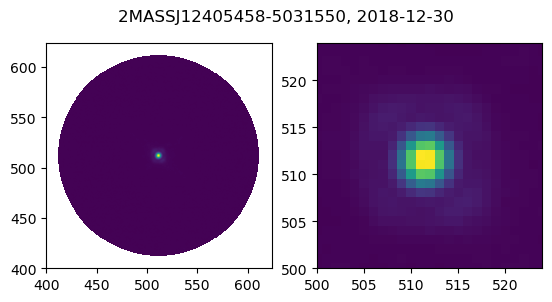

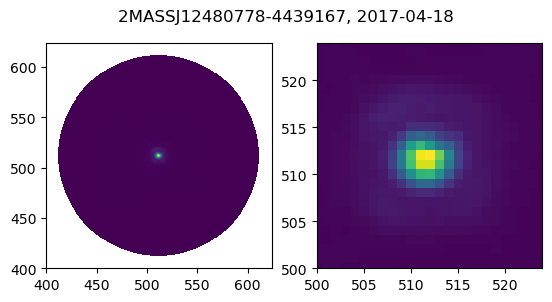

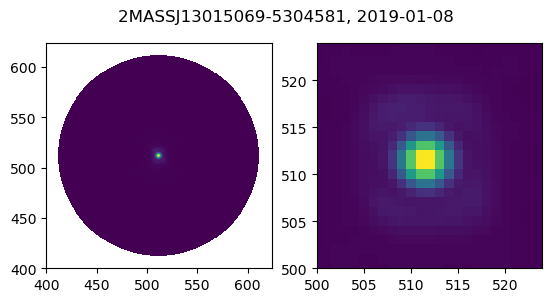

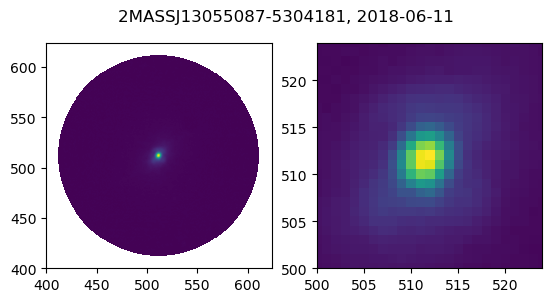

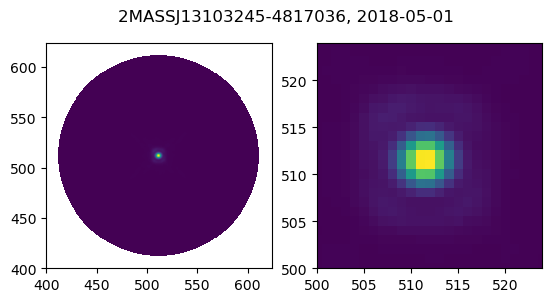

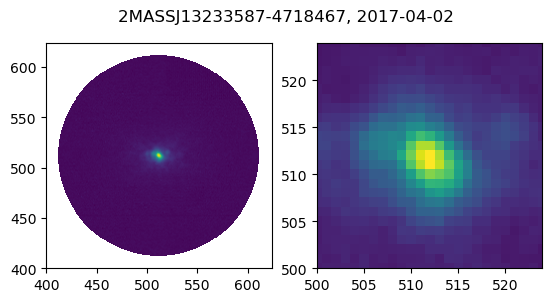

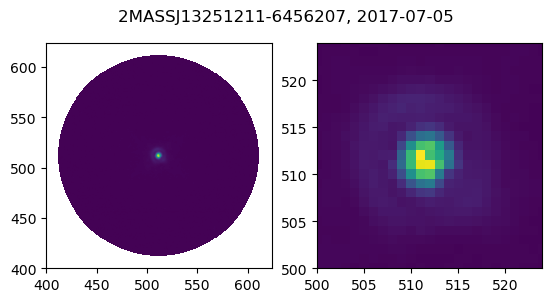

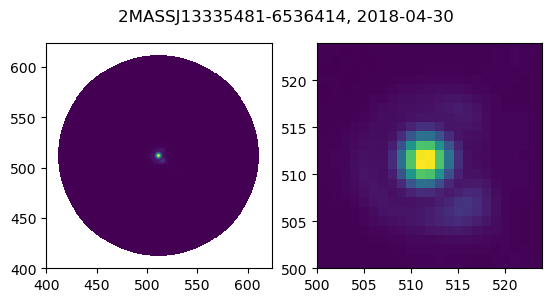

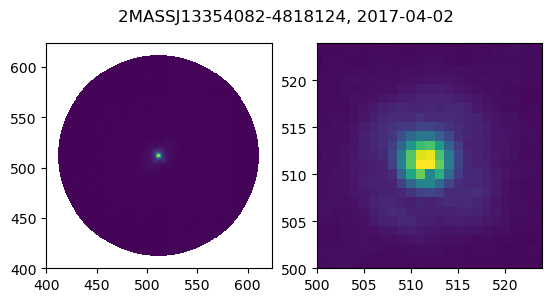

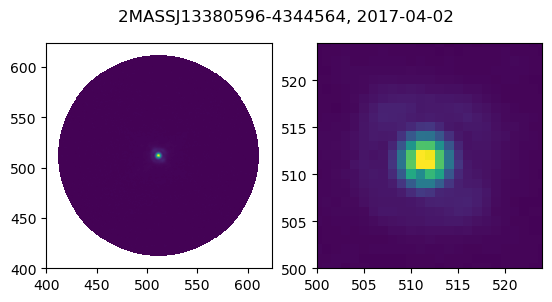

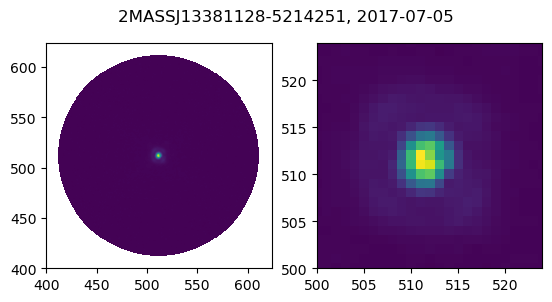

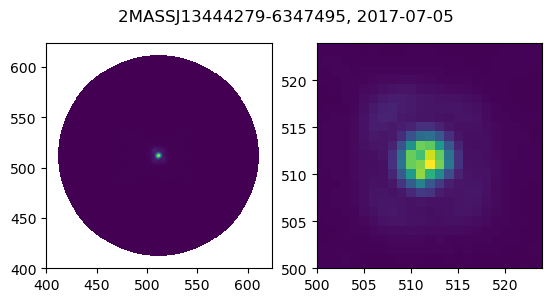

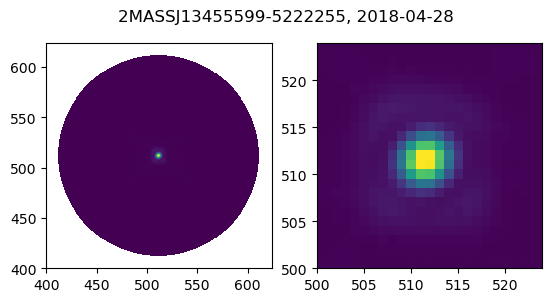

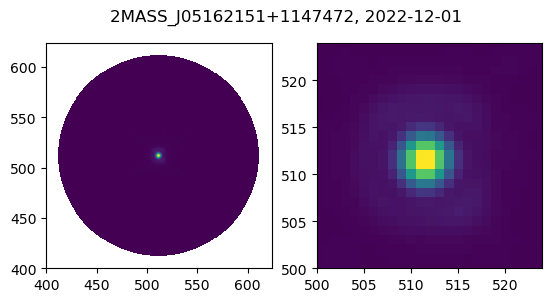

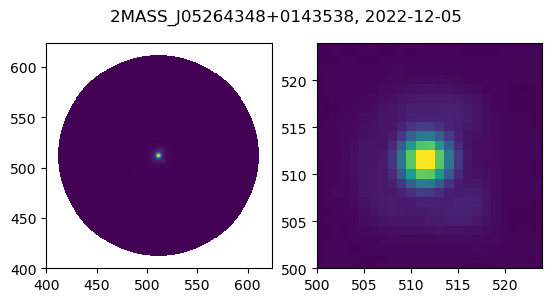

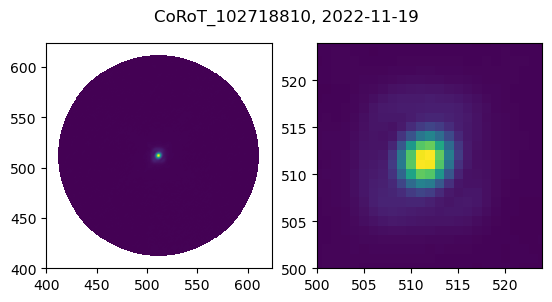

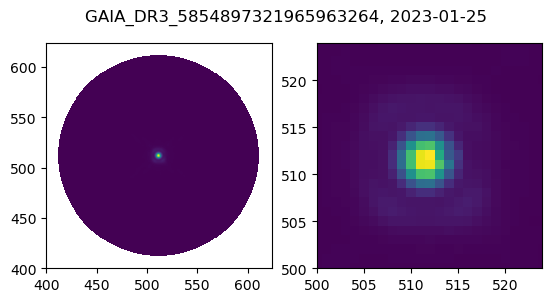

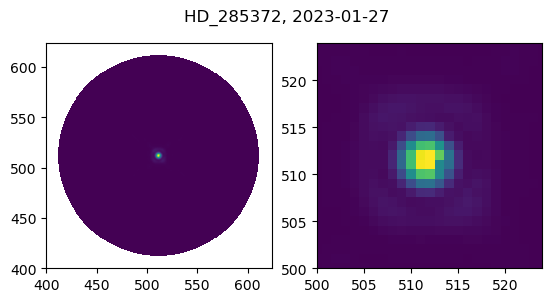

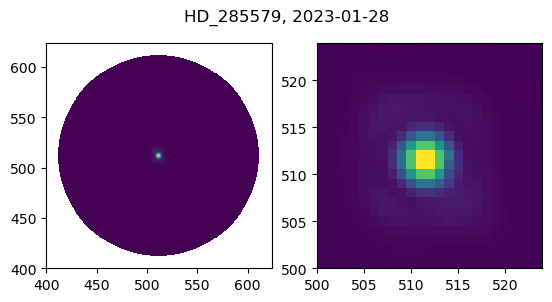

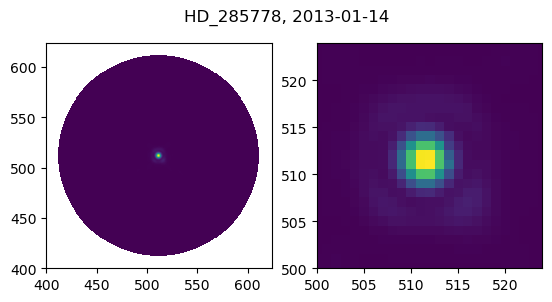

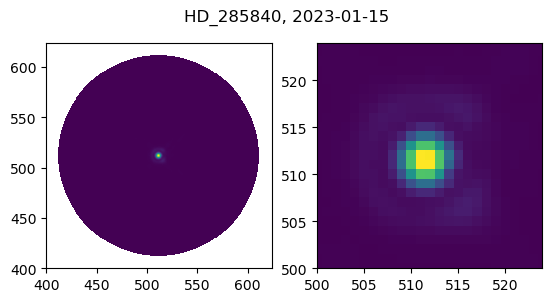

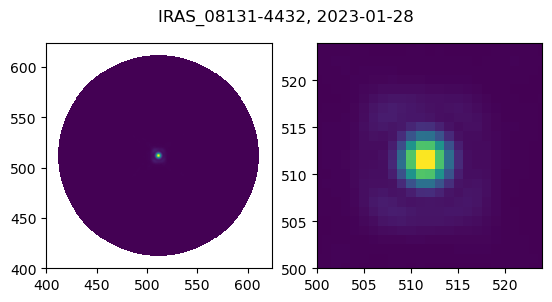

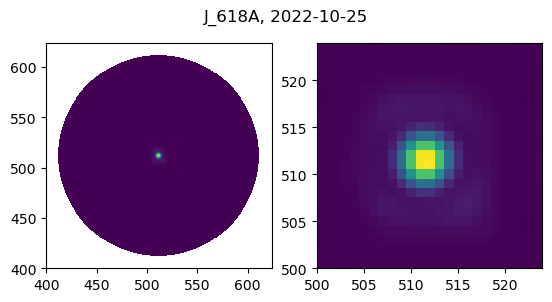

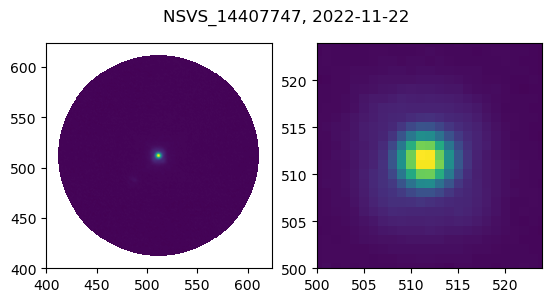

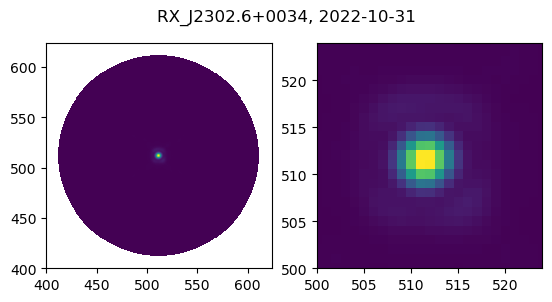

KeyboardInterrupt: 

In [53]:
for i in range(len(single_stars)):
        print_stars(i, single_stars)

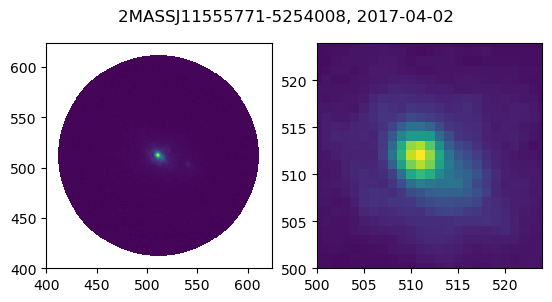

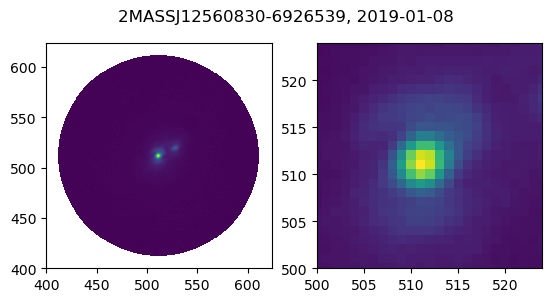

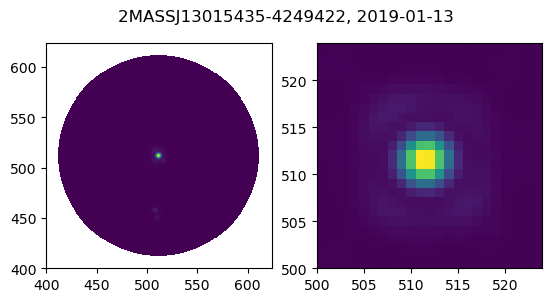

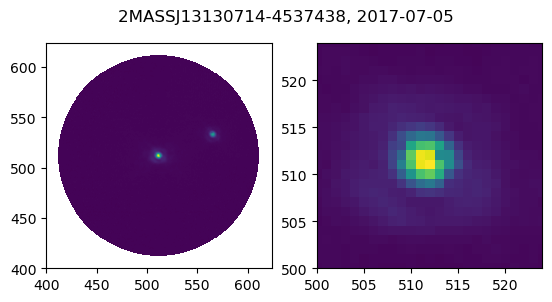

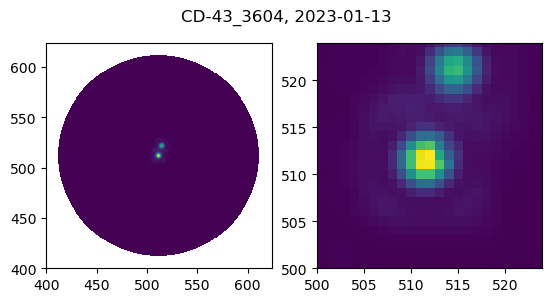

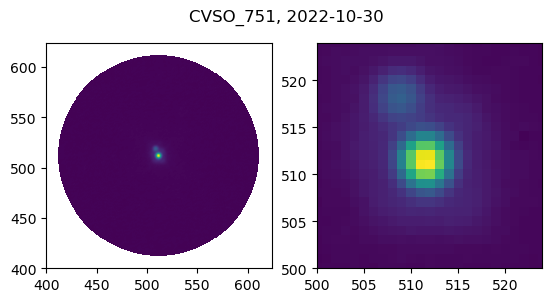

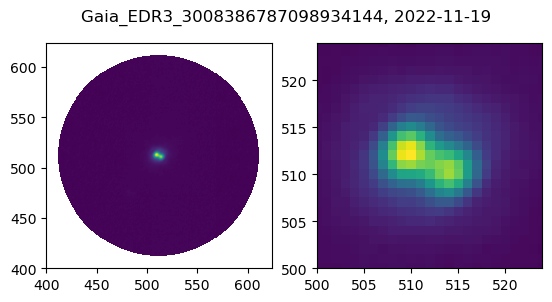

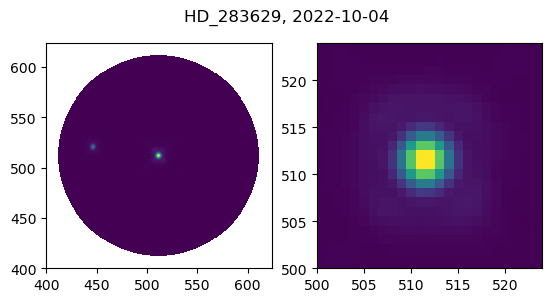

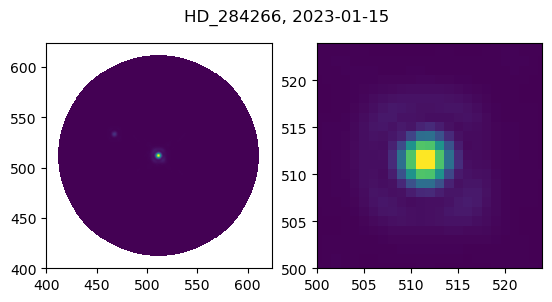

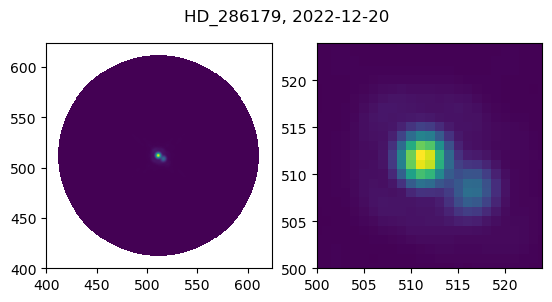

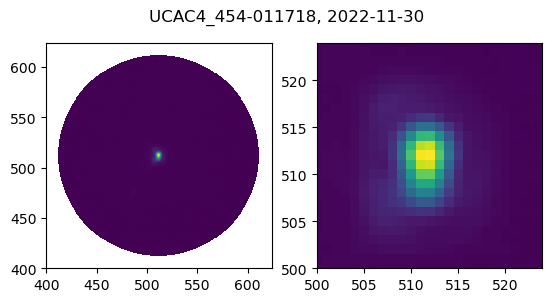

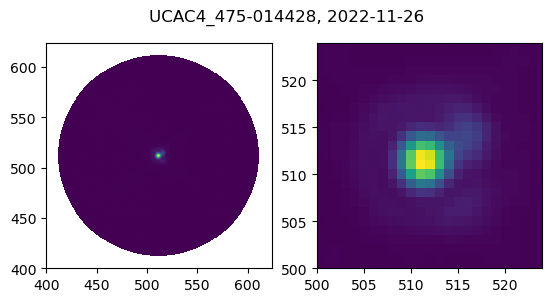

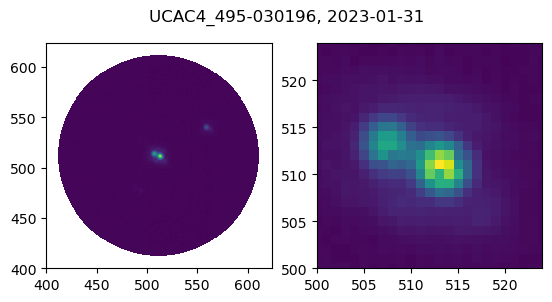

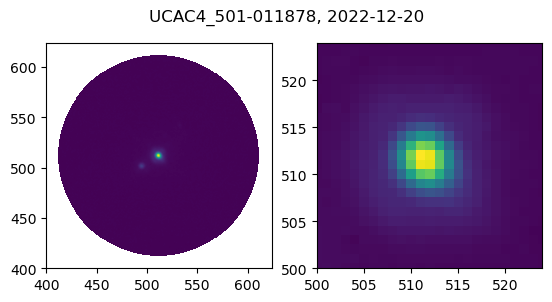

In [57]:
for i in range(len(binary_stars)):
    print_stars(i, binary_stars)

# 3. Add up all arrays and take the median
- Maak array met sterren erin en de waardes die daarbij horen

In [13]:
def give_star(path, idx):
    return calibration(star_data(path, idx))

In [14]:
#Only run once, it is very slow
star_arr = np.array([give_star(path_sin, 0)])
for i in range(1, len(sin_st)):
    star_arr = np.append(star_arr, np.array([give_star(path_sin, i)]), axis = 0) 

In [15]:
med_arr = np.median(star_arr, axis = 0) #gives median of the array

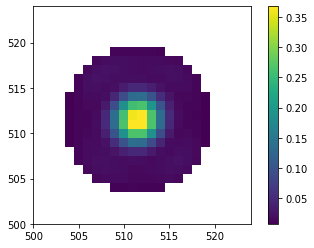

In [184]:
plt.imshow(med_arr)
plt.gca().invert_yaxis()
plt.xlim(500, 524)
plt.ylim(500, 524)
plt.colorbar()
plt.show()

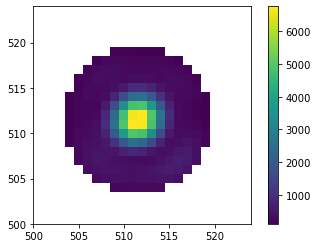

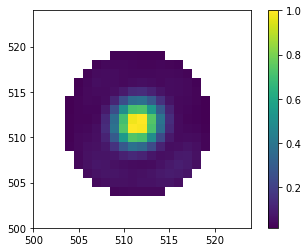

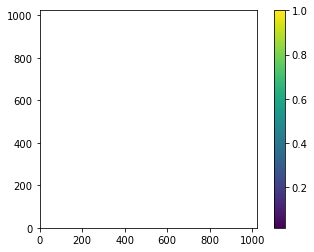

In [185]:
star4 = star_data(path_sin, 3)
star5 = calibration(star4)
star6 = normalize(star4)

plt.imshow(star4)
plt.gca().invert_yaxis()
plt.xlim(500, 524)
plt.ylim(500, 524)
plt.colorbar()
plt.show()

plt.imshow(star5)
plt.gca().invert_yaxis()
plt.xlim(500, 524)
plt.ylim(500, 524)
plt.colorbar()
plt.show()

plt.imshow(star6)
plt.gca().invert_yaxis()
#plt.xlim(500, 524)
#plt.ylim(500, 524)
plt.colorbar()
plt.show()

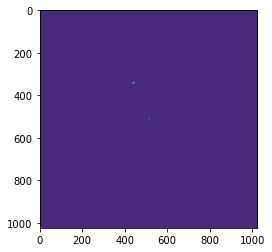

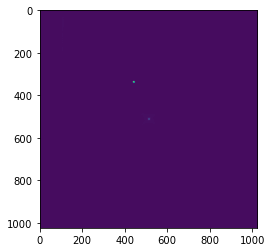

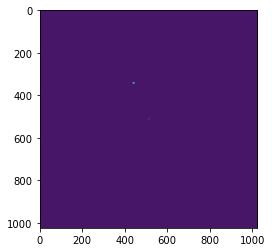

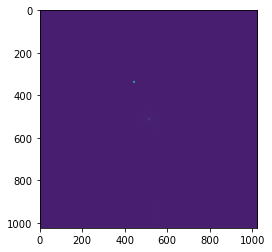

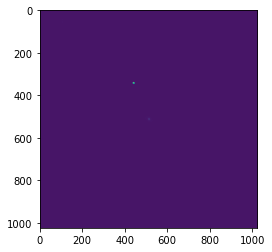

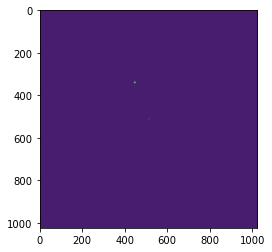

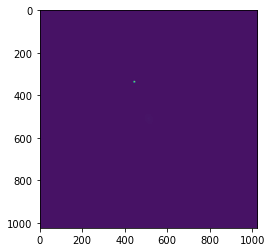

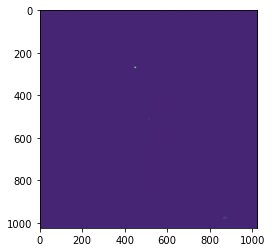

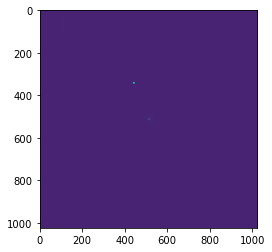

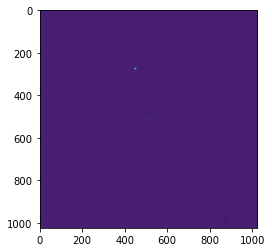

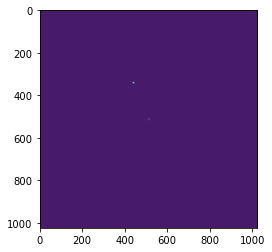

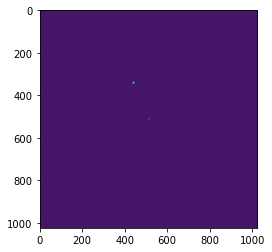

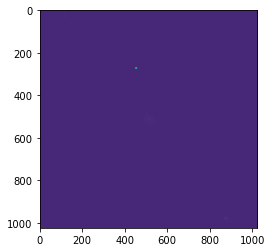

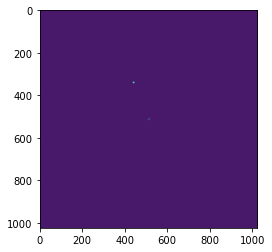

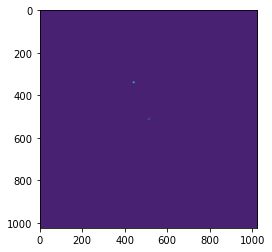

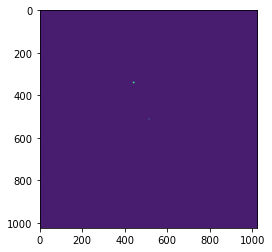

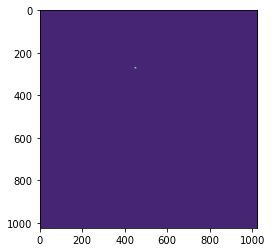

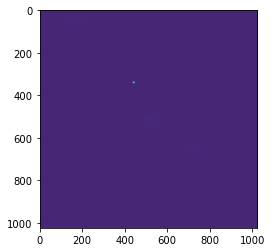

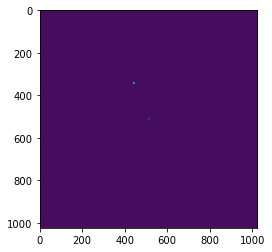

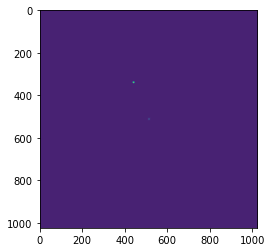

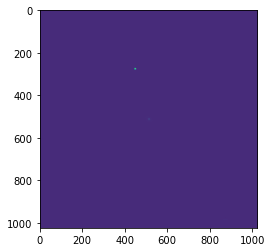

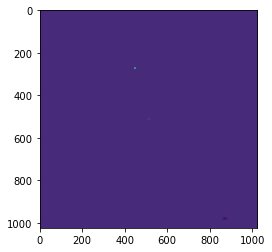

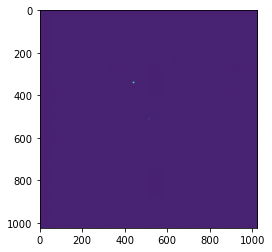

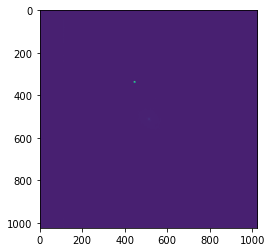

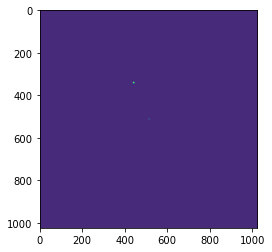

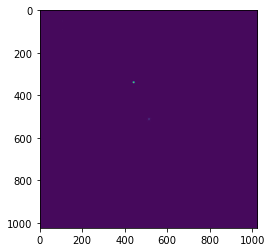

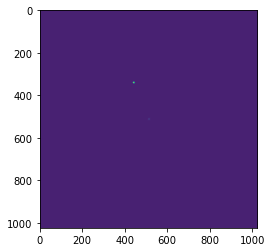

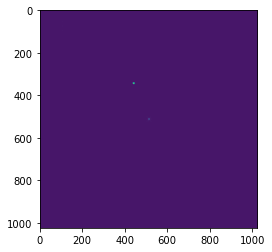

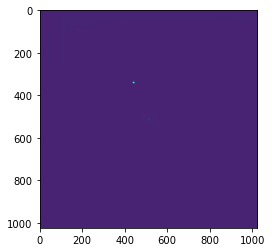

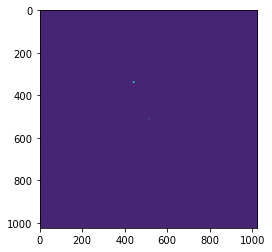

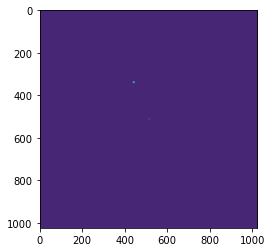

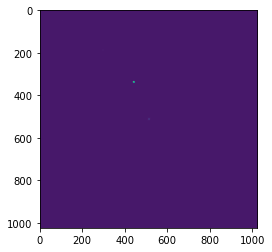

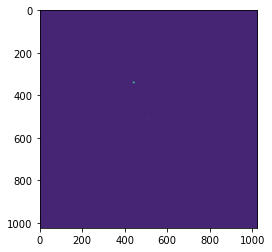

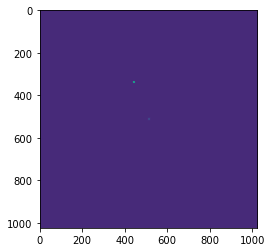

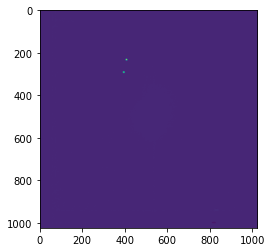

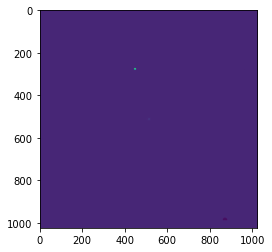

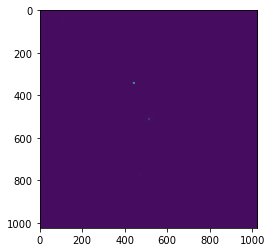

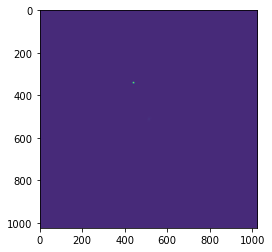

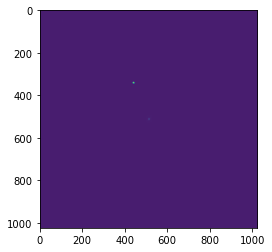

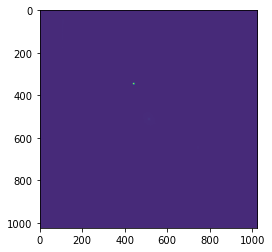

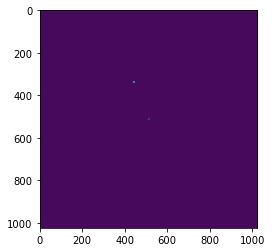

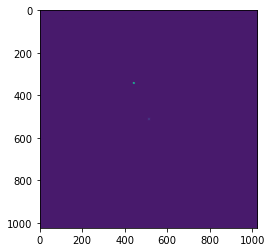

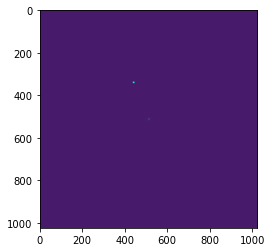

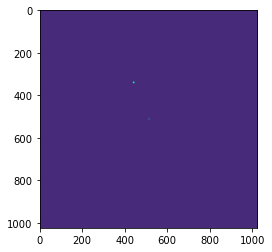

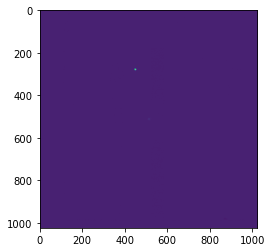

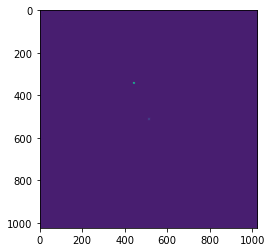

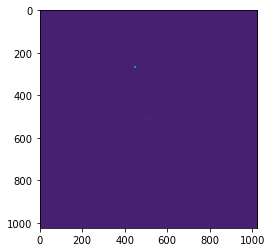

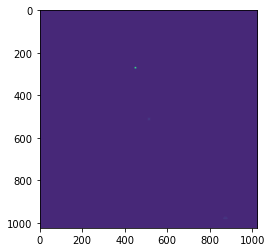

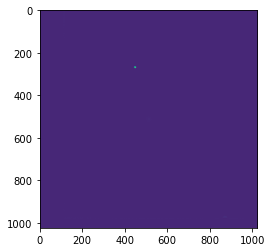

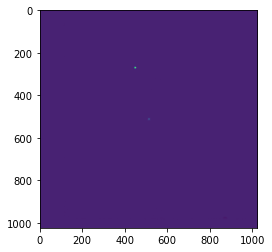

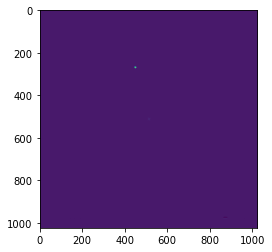

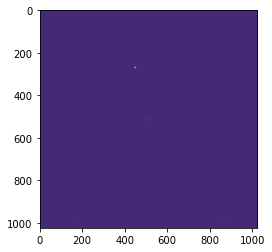

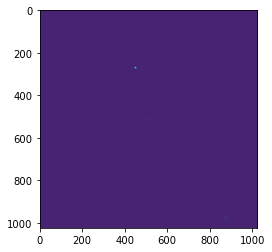

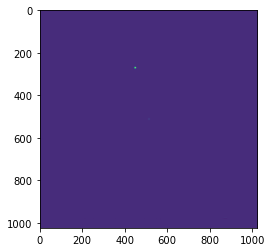

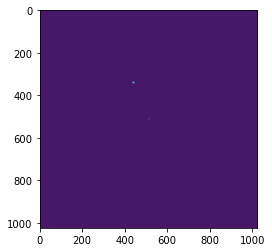

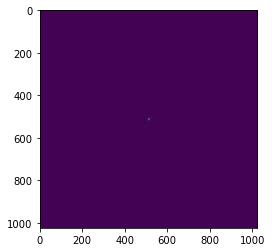

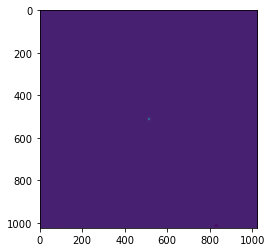

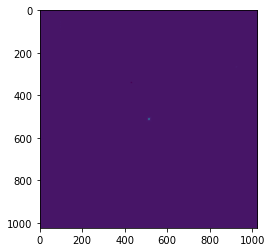

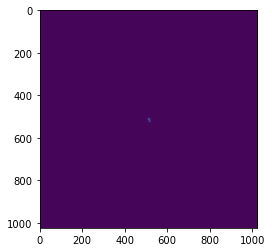

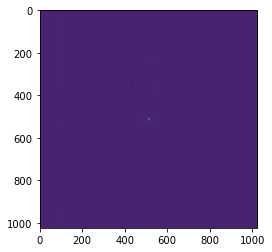

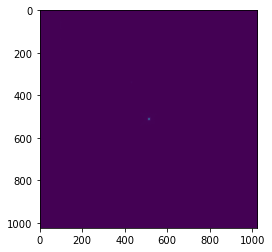

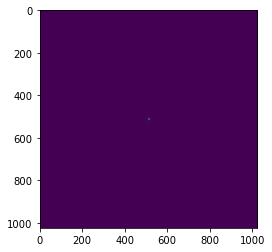

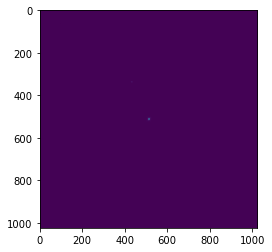

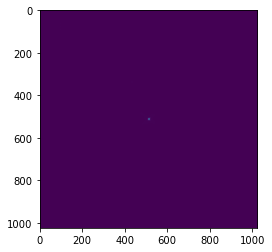

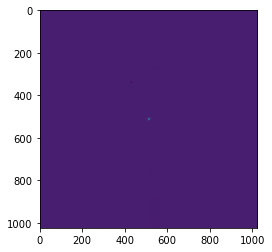

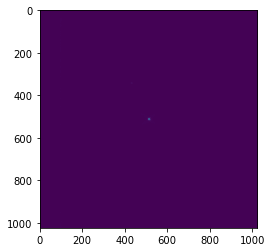

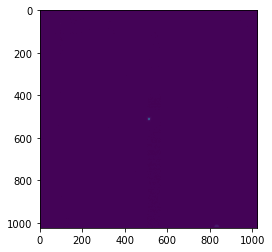

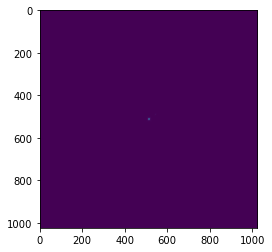

In [186]:
for i in range(len(sin_st)):
        star = star_data(path_sin, i)
        plt.imshow(star)
        plt.show()

# 5. Subtract median star from test stars

In [187]:
def subtract_star(im, med_st):
    ''' Subtract the median star from the image and images the results'''
    im = normalize(im)
    rest = im - med_st
    return rest

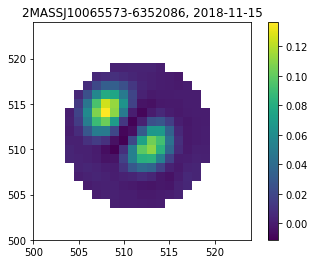

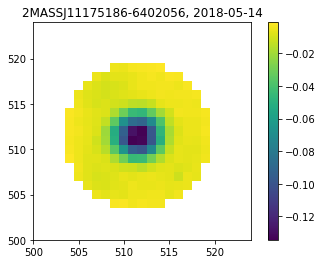

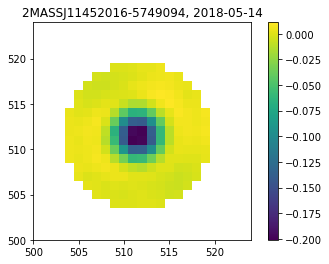

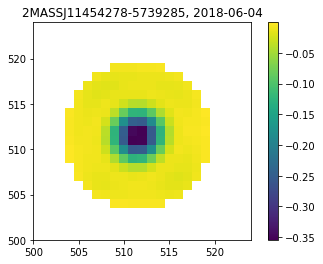

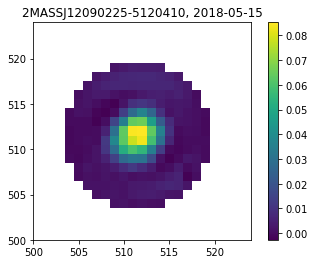

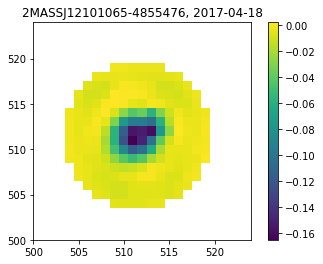

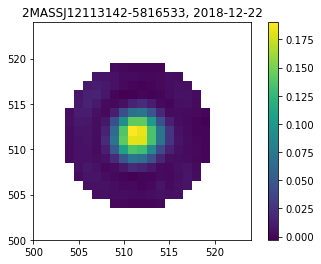

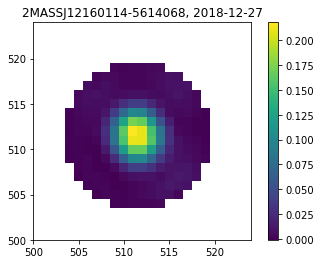

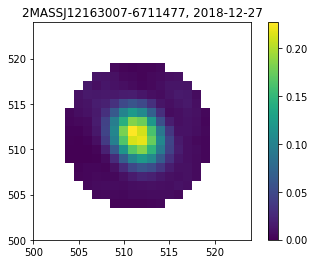

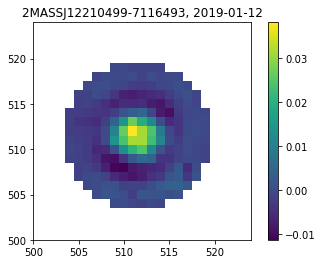

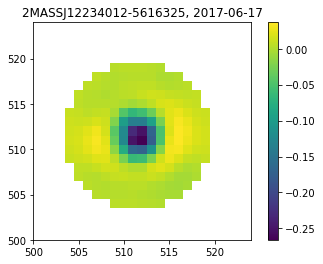

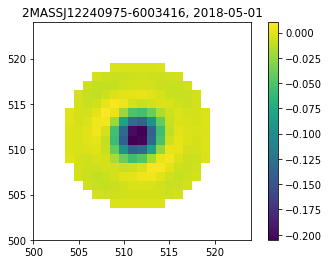

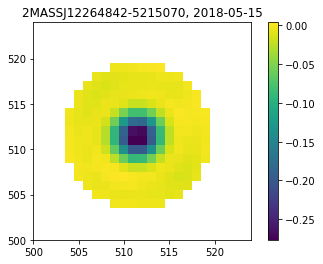

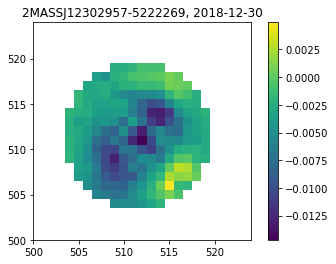

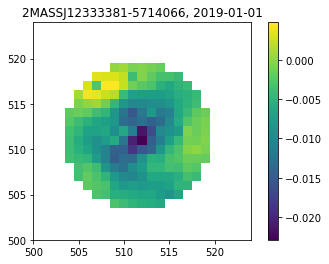

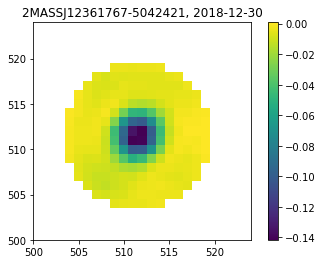

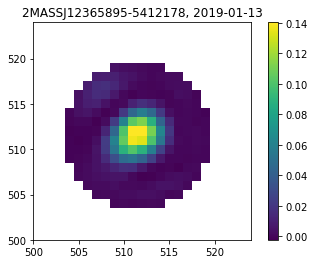

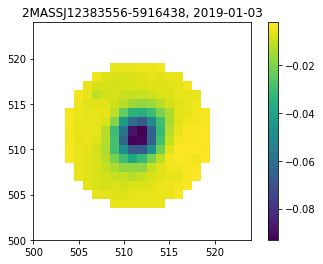

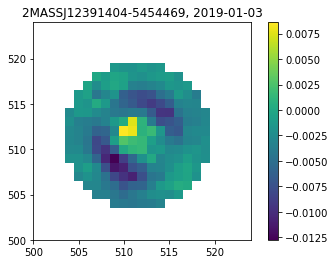

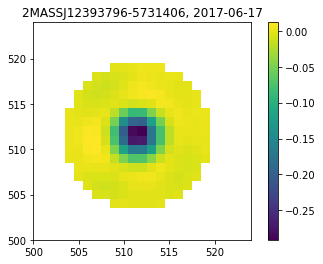

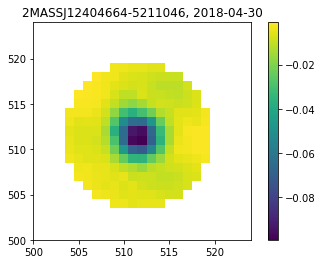

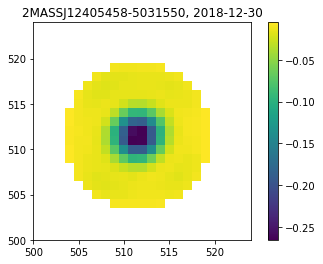

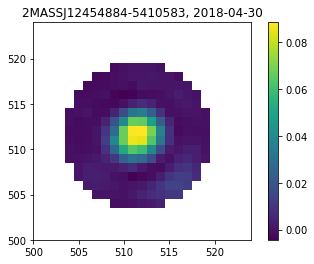

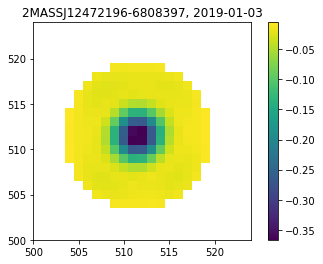

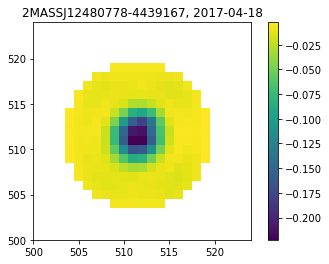

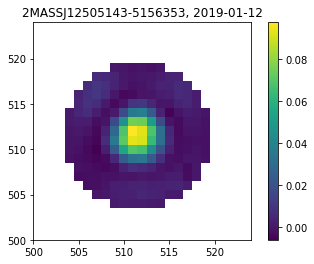

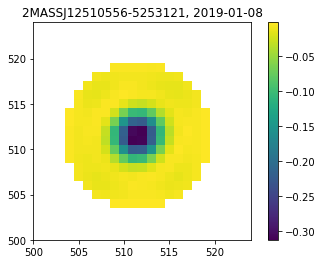

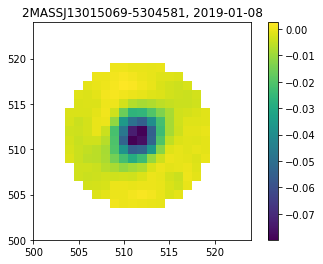

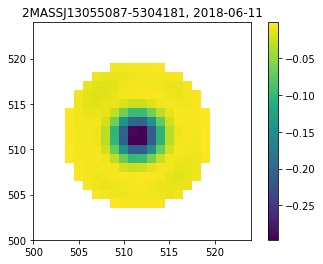

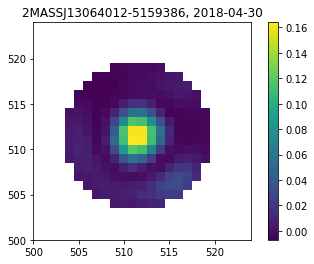

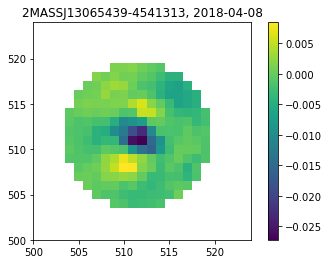

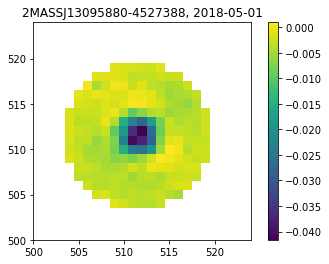

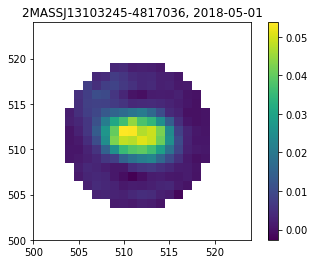

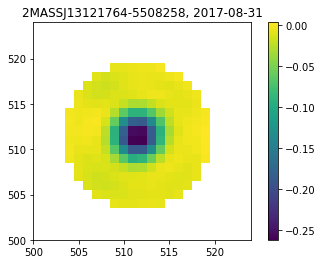

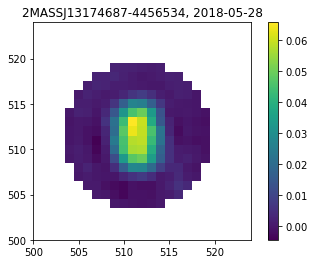

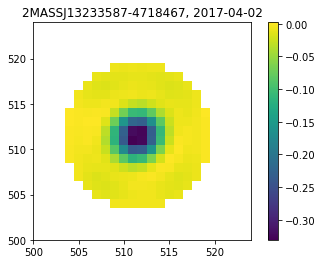

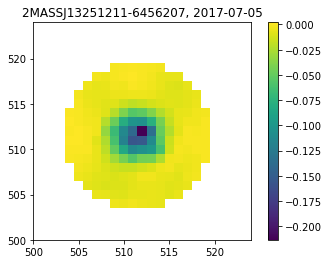

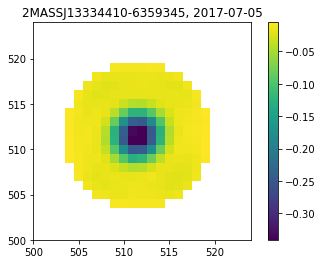

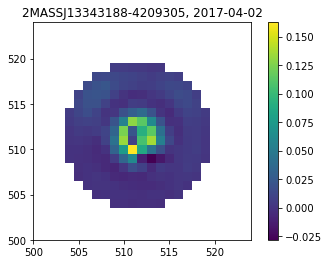

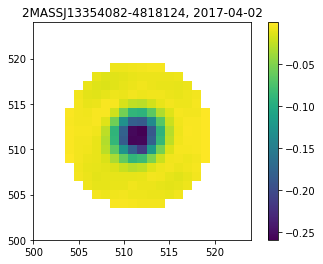

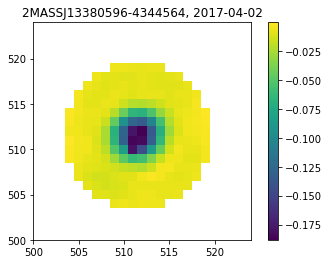

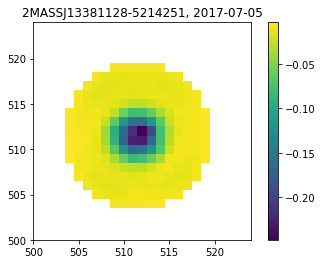

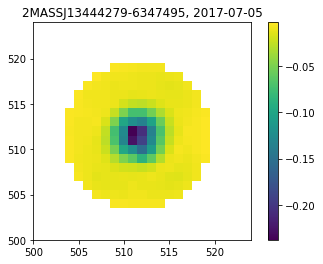

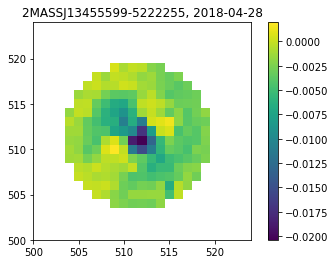

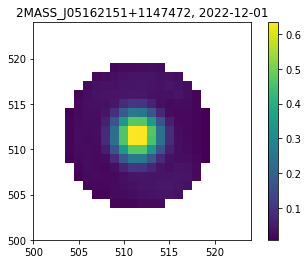

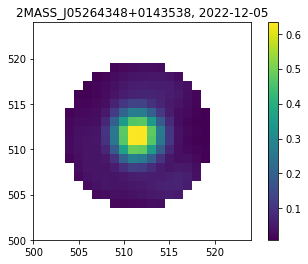

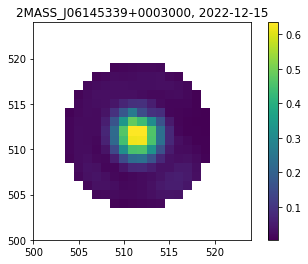

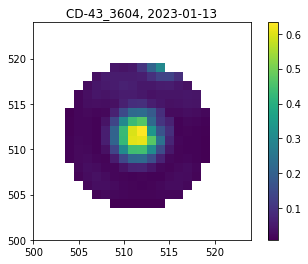

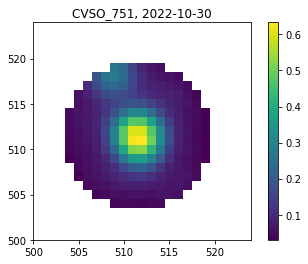

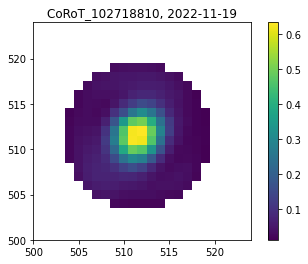

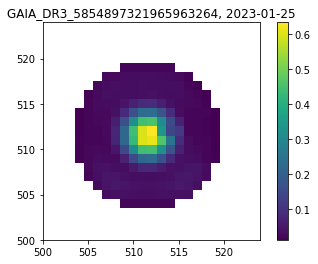

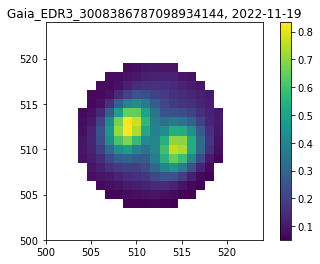

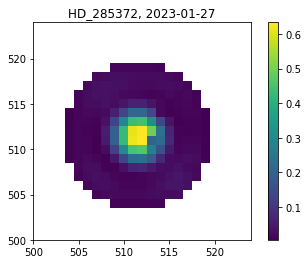

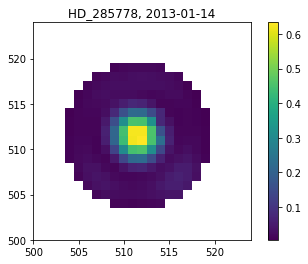

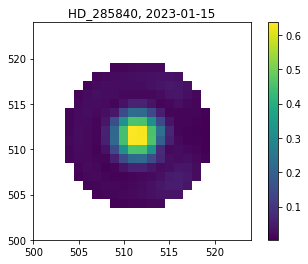

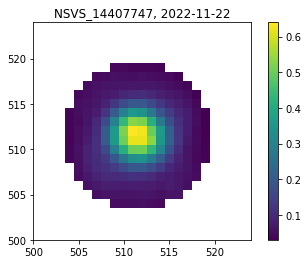

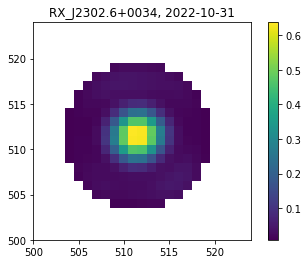

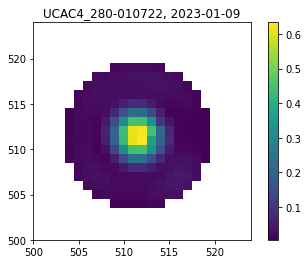

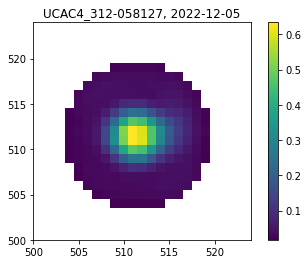

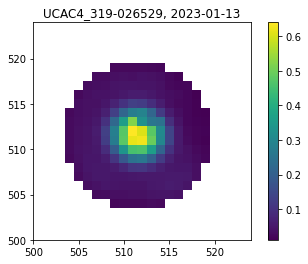

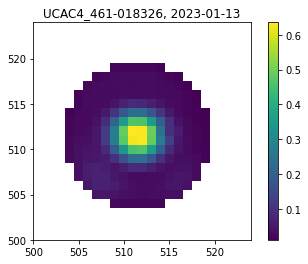

In [188]:
for i in range(len(sin_st)):
    rest = subtract_star(star_data(path_sin, i), med_arr)
    name, date = star_info(path_sin, i)
    plt.title(f'{name}, {date}')
    plt.imshow(rest)
    plt.colorbar()
    plt.xlim(500, 524)
    plt.ylim(500, 524)
    plt.show()

In [190]:
subtract_star(star_data(path_sin, 1), med_arr)
name, date = star_info(path_sin, 1)
plt.title(f'{name}, {date}')
plt.imshow(rest)
plt.colorbar()
plt.xlim(500, 524)
plt.ylim(500, 524)
plt.show()

# .reg files
1. Want to open them
2. Want to be able to read them
3. Search for key word circle
4. Save x and y coordinate
    - Are all coordinates equally long? --> if not begin next at ,
    - Do not save radius too

In [21]:
def find_x_y_reg(file, loc_circle, sep):
    ''' Opens the .reg file and returns the x and y coordinate in the file. loc_circle is the number of the line
    where the information on the circle is stored and sep is the thing used for seperating the x and y coord. '''
    with open(file, 'rt') as reg:
        data_reg = reg.readlines()
        data_reg = data_reg[loc_circle]
    
    first, second = data_reg.find(sep), data_reg.rfind(sep)
    return float(data_reg[7:first]), float(data_reg[(first+1):second])

In [22]:
x, y = find_x_y_reg(f'data/{star}/{date}/{star}_{date}.reg', 3, ',')

FileNotFoundError: [Errno 2] No such file or directory: '[[-0.7277387  -0.7277387  -0.7277387  ... -0.7277387  -0.7277387\n  -0.7277387 ]\n [-0.7277387  -0.7277387  -0.7277387  ... -0.7277387  -0.7277387\n  -0.7277387 ]\n [-0.7277387  -0.7277387  -0.7277387  ... -0.7277387  -0.7277387\n  -0.7277387 ]\n ...\n [-0.7277387  -0.7277387  -0.7277387  ...  1.2036934  -1.1817302\n   5.0953407 ]\n [-0.7277387  -0.7277387  -0.7277387  ... -0.5805831  -2.933764\n   1.0757122 ]\n [-0.7277387  -0.7277387  -0.7277387  ... -0.7962153  -1.8221085\n  -0.07309442]]/2023-01-15/[[-0.7277387  -0.7277387  -0.7277387  ... -0.7277387  -0.7277387\n  -0.7277387 ]\n [-0.7277387  -0.7277387  -0.7277387  ... -0.7277387  -0.7277387\n  -0.7277387 ]\n [-0.7277387  -0.7277387  -0.7277387  ... -0.7277387  -0.7277387\n  -0.7277387 ]\n ...\n [-0.7277387  -0.7277387  -0.7277387  ...  1.2036934  -1.1817302\n   5.0953407 ]\n [-0.7277387  -0.7277387  -0.7277387  ... -0.5805831  -2.933764\n   1.0757122 ]\n [-0.7277387  -0.7277387  -0.7277387  ... -0.7962153  -1.8221085\n  -0.07309442]]_2023-01-15.reg'

In [ ]:
x